In [3]:
import numpy as np
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

## Read df and preprocess

In [4]:
df = pd.read_csv('/home/john/DataspellProjects/AnalyzingLyricsByAI/data/perfect_dataset.csv')
df.head()

,old_tag,title_x,artist_x,text,views,processed_artist,processed_title,tag,artist_y,title_y,processed title,artist_title
0,rock,Bring Me to Life,Evanescence,[Verse 1: Amy Lee]\nHow can you see into my ey...,658884,evanescence,bringmetolife,metal,Evanescence,Bring Me To Life,bringmetolife,evanescencebringmetolife
1,rock,My Immortal,Evanescence,[Verse 1]\nI'm so tired of being here\nSuppres...,392209,evanescence,myimmortal,metal,Evanescence,My Immortal,myimmortal,evanescencemyimmortal
2,rock,Zombie,Bad Wolves,[Verse 1]\nAnother head hangs lowly\nChild is ...,342157,badwolves,zombie,metal,Bad Wolves,Zombie,zombie,badwolveszombie
3,rock,A Little Piece of Heaven,Avenged Sevenfold,[Verse 1: M. Shadows]\nBefore the story begins...,259796,avengedsevenfold,alittlepieceofheaven,metal,Avenged Sevenfold,A Little Piece of Heaven,alittlepieceofheaven,avengedsevenfoldalittlepieceofheaven
4,rock,Doomsday,Architects,[Verse 1]\nRemember when Hell had frozen over?...,217795,architects,doomsday,metal,Architects,Doomsday,doomsday,architectsdoomsday


In [5]:
df.shape

(175000, 12)

In [6]:
df = df.sample(frac=0.2, random_state=42)
df.shape

(35000, 12)

In [7]:
df = df[['text', 'tag']]
df.columns = ['lyrics', 'genre']
df.head()

,lyrics,genre
148789,[Instrumental intro 0:00-1:03]\n\n[Chorus]\nWi...,rock
169618,"Brother, Brother\nHelp me please\nI'm as lonel...",rock
131258,"[Intro: Howard Hewett, Monty Seward]\nYou know...",rb
31864,Gazing at the stars\nWe're flying over million...,metal
11032,"Timeless we are, timeless we are\nChildren run...",metal


In [8]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
# Remove stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    text = word_tokenize(text)
    text = [stemmer.stem(word) for word in text if word not in stop_words and word not in string.punctuation and len(word)]
    return ' '.join(text)

train_df['lyrics'] = train_df['lyrics'].apply(preprocess_text)
test_df['lyrics'] = test_df['lyrics'].apply(preprocess_text)

In [10]:
# Apply tf idf on feature (lyrics)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7, min_df=0.0001)
X_train = tfidf.fit_transform(train_df['lyrics'])
X_test = tfidf.transform(test_df['lyrics'])
X_train.shape

(28000, 49040)

In [11]:
# # n-grams bag of words
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(ngram_range=(1, 2))
# X_train = cv.fit_transform(train_df['lyrics'])
# X_test = cv.transform(test_df['lyrics'])
# X_train.shape

In [12]:
# Encode target
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
y_train = encoder.fit_transform(train_df[['genre']]).ravel()
y_test = encoder.transform(test_df[['genre']]).ravel()
y_train.shape

(28000,)

## Classical ML models

In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

model = SGDClassifier(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'))

0.6252857142857143 0.6135586973099241 0.6252857142857143


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score

model = LogisticRegression(max_iter=1000, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'))


0.6317142857142857 0.6316112544304843 0.6317142857142857


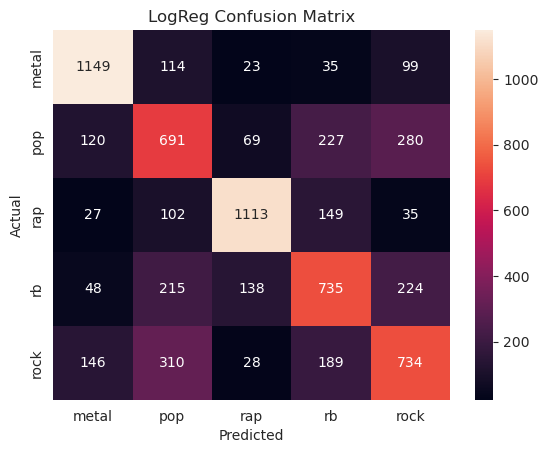

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LogReg Confusion Matrix')
plt.savefig('log_reg_cm.png')

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'))


0.2927142857142857 0.23249544597577573 0.2927142857142857


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'))


0.614 0.6100761267922902 0.614


In [27]:
# gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'))

0.61 0.6094679132273733 0.61
